# Energy Efficiency 

**Features**

    RelativeCompactness
    SurfaceArea
    WallArea
    RoofArea
    OverallHeight
    Orientation
    GlazingArea
    GlazingAreaDistribution

**Predict**

    Y1: Heating_Load
    Y2: Cooling_Load

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [38]:
df_raw=pd.read_csv('energy_efficiency_data.csv')

In [39]:
df=df_raw.copy()

In [40]:
pd.set_option('display.max_columns',None)
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Data procressing

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [42]:
df.isna().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [43]:
df.nunique()

Relative_Compactness          12
Surface_Area                  12
Wall_Area                      7
Roof_Area                      4
Overall_Height                 2
Orientation                    4
Glazing_Area                   4
Glazing_Area_Distribution      6
Heating_Load                 586
Cooling_Load                 636
dtype: int64

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_Area_Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling_Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


## EDA

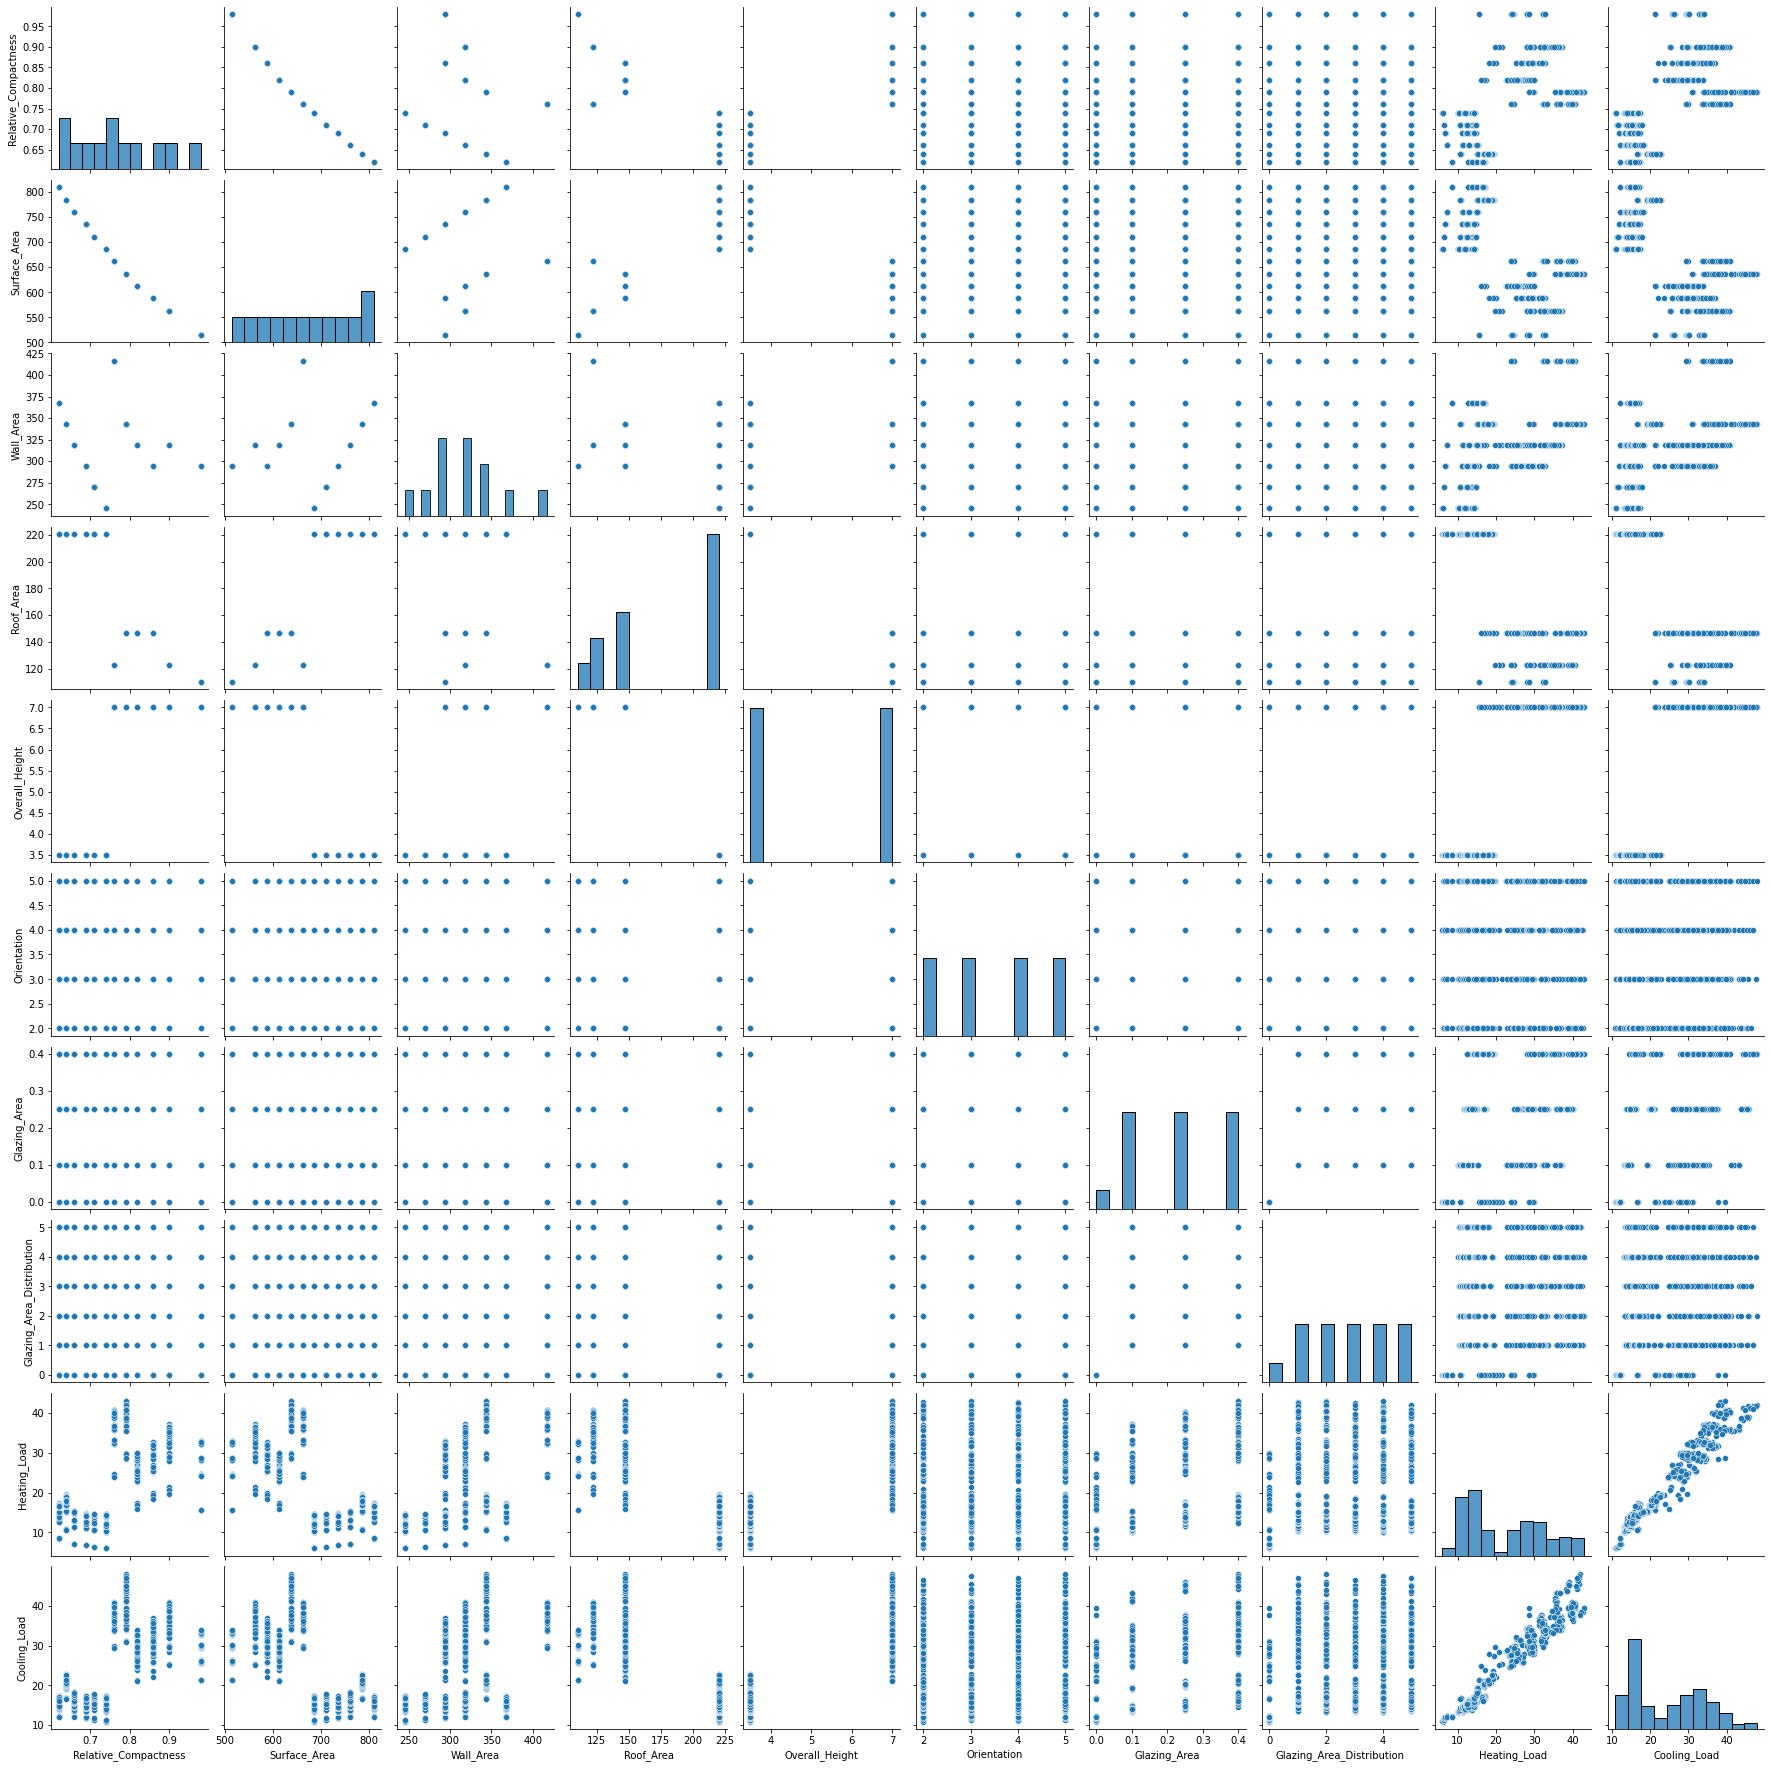

In [45]:
sns.pairplot(df)

<AxesSubplot:>

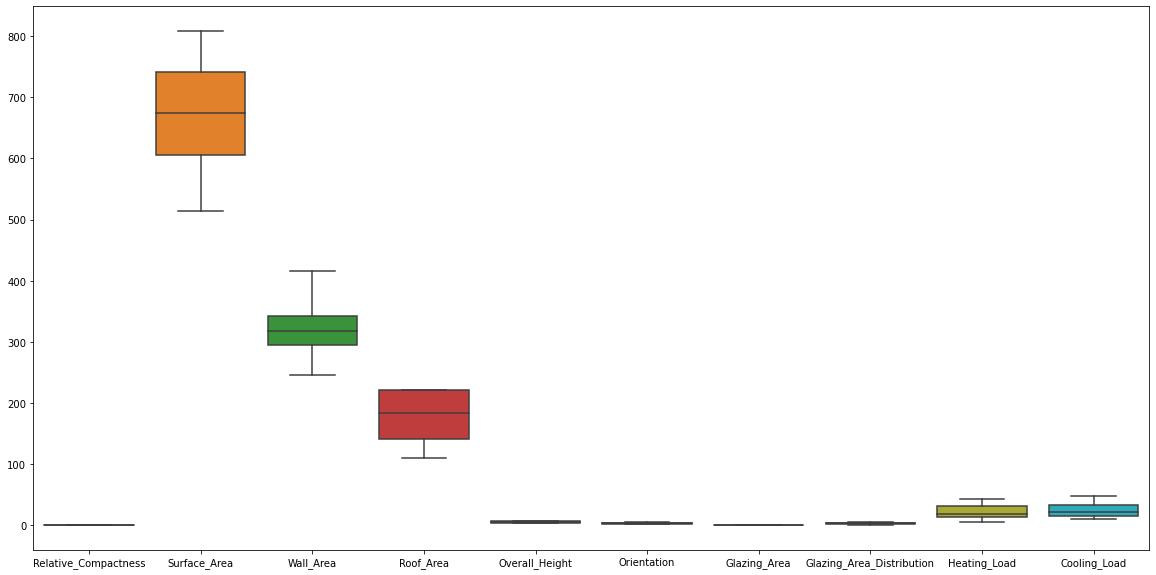

In [46]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

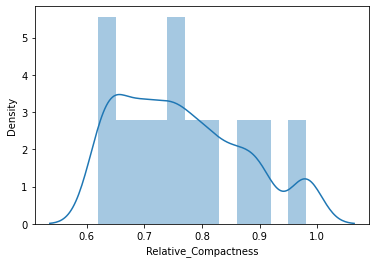

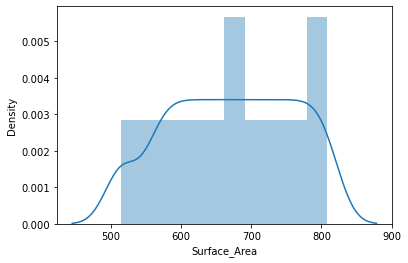

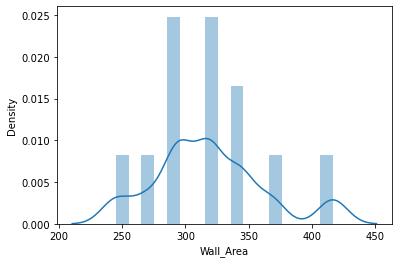

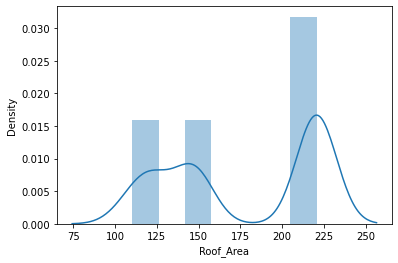

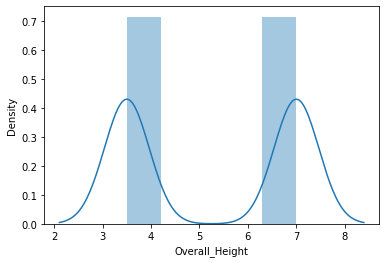

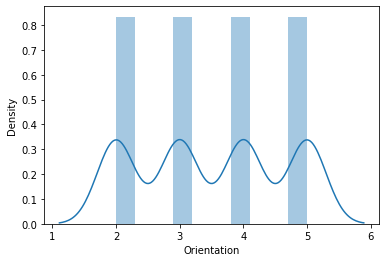

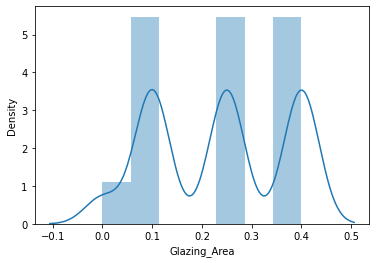

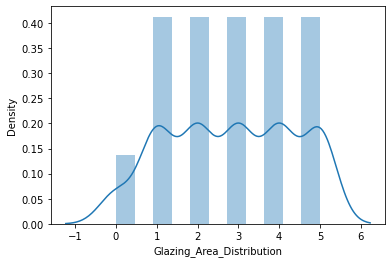

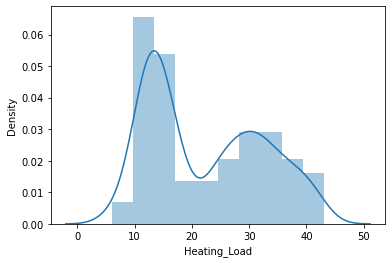

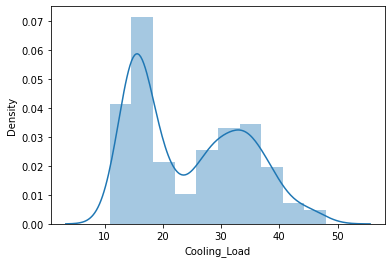

In [47]:
for i in df.columns:
    sns.distplot(df[i],kde=True)
    plt.show()

In [48]:
df.corr()['Heating_Load'].sort_values()

Roof_Area                   -0.861828
Surface_Area                -0.658120
Orientation                 -0.002587
Glazing_Area_Distribution    0.087368
Glazing_Area                 0.269841
Wall_Area                    0.455671
Relative_Compactness         0.622272
Overall_Height               0.889431
Cooling_Load                 0.975862
Heating_Load                 1.000000
Name: Heating_Load, dtype: float64

In [49]:
df.corr()['Cooling_Load'].sort_values()

Roof_Area                   -0.862547
Surface_Area                -0.672999
Orientation                  0.014290
Glazing_Area_Distribution    0.050525
Glazing_Area                 0.207505
Wall_Area                    0.427117
Relative_Compactness         0.634339
Overall_Height               0.895785
Heating_Load                 0.975862
Cooling_Load                 1.000000
Name: Cooling_Load, dtype: float64

<AxesSubplot:>

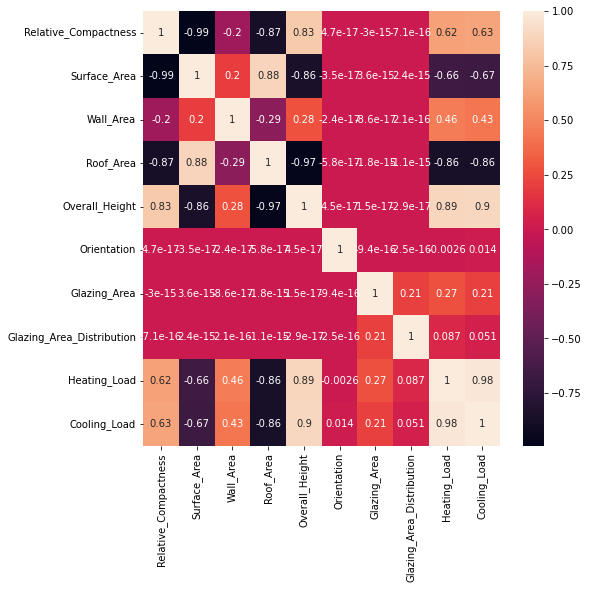

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

## Outliers

In [51]:
from scipy import stats

In [52]:
df.shape

(768, 10)

In [53]:
df=df[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [54]:
df.shape

(768, 10)

## Train and Test Data

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X=df.drop(['Heating_Load','Cooling_Load'],axis=1)
y=df[['Heating_Load','Cooling_Load']]
y1=df['Heating_Load']
y2=df['Cooling_Load']

In [57]:
X.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [58]:
y.head()

,Heating_Load,Cooling_Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

## Scaling

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Models

## Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [65]:
M1=LinearRegression()
M1.fit(X_train,y_train)

LinearRegression()

In [67]:
P1=M1.predict(X_test)

In [69]:
P1[0]

array([18.86296033, 19.75455641])

In [73]:
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P1)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P1))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P1))
print('\n')
print('R2_Score',r2_score(y_test,P1))

mean_squared_error: 3.0859857017772163


mean_absolute_error: 2.1886711163219


mean_squared_error: 9.52330775157342


R2_Score 0.9027048110077098


## Linear Regression digree2

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [75]:
M2=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
M2.fit(X_train,y_train)
P2=M2.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P2)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P2))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P2))
print('\n')
print('R2_Score',r2_score(y_test,P2))

mean_squared_error: 1.3430432817981202


mean_absolute_error: 0.8969073486328124


mean_squared_error: 1.8037652567830647


R2_Score 0.9809184735876703


## Linear Regression digree3

In [76]:
M3=make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
M3.fit(X_train,y_train)
P3=M3.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P3)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P3))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P3))
print('\n')
print('R2_Score',r2_score(y_test,P3))

mean_squared_error: 1.2457187395553857


mean_absolute_error: 0.821341861873478


mean_squared_error: 1.5518151780794587


R2_Score 0.9834298995780413


## Ridge Regression(L2)

In [77]:
from sklearn.linear_model import Ridge

In [79]:
M4=Ridge()
M4.fit(X_train,y_train)
P4=M4.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P4)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P4))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P4))
print('\n')
print('R2_Score',r2_score(y_test,P4))

mean_squared_error: 3.094430867688311


mean_absolute_error: 2.1933195149500317


mean_squared_error: 9.575502394902232


R2_Score 0.9021778397382796


## Ridge Regression(L2) dig 2

In [81]:
M5=make_pipeline(PolynomialFeatures(degree=2),Ridge())
M5.fit(X_train,y_train)
P5=M5.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P5)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P5))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P5))
print('\n')
print('R2_Score',r2_score(y_test,P5))

mean_squared_error: 2.4161321255902233


mean_absolute_error: 1.712517284389288


mean_squared_error: 5.837694448309131


R2_Score 0.9398702796522524


## Ridge Regression(L2) dig 3

In [82]:
M6=make_pipeline(PolynomialFeatures(degree=3),Ridge())
M6.fit(X_train,y_train)
P6=M6.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P6)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P6))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P6))
print('\n')
print('R2_Score',r2_score(y_test,P6))

mean_squared_error: 1.5519661740701634


mean_absolute_error: 1.186599747786013


mean_squared_error: 2.4085990054579804


R2_Score 0.9747131839968339


## Lasso (L1)

In [83]:
from sklearn.linear_model import Lasso

In [84]:
M7=Lasso()
M7.fit(X_train,y_train)
P7=M7.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P7)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P7))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P7))
print('\n')
print('R2_Score',r2_score(y_test,P7))

mean_squared_error: 3.6177667945159424


mean_absolute_error: 2.651076959497929


mean_squared_error: 13.088236579502158


R2_Score 0.8661904269511767


## Lasso (L1) dig2

In [85]:
M8=make_pipeline(PolynomialFeatures(degree=2),Lasso())
M8.fit(X_train,y_train)
P8=M8.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P8)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P8))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P8))
print('\n')
print('R2_Score',r2_score(y_test,P8))

mean_squared_error: 3.617767282840561


mean_absolute_error: 2.6510775601172245


mean_squared_error: 13.088240112791576


R2_Score 0.8661904151445088


## SGDRegressor

In [86]:
from sklearn.linear_model import SGDRegressor

#### Cant be used for Multiple Output

## Decision Tree Regressor

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
M9=DecisionTreeRegressor()
M9.fit(X_train,y_train)
P9=M9.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P9)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P9))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P9))
print('\n')
print('R2_Score',r2_score(y_test,P9))

mean_squared_error: 1.7046205351429886


mean_absolute_error: 0.8338961038961039


mean_squared_error: 2.905731168831169


R2_Score 0.9688438473802966


## Random Forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
M10=RandomForestRegressor()
M10.fit(X_train,y_train)
P10=M10.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P10)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P10))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P10))
print('\n')
print('R2_Score',r2_score(y_test,P10))

mean_squared_error: 1.4140347775003685


mean_absolute_error: 0.7609327922077909


mean_squared_error: 1.999494351980517


R2_Score 0.978564631731097


## KNN Regressor

In [94]:
from sklearn.neighbors import KNeighborsRegressor

Text(0, 0.5, 'Error Rate')

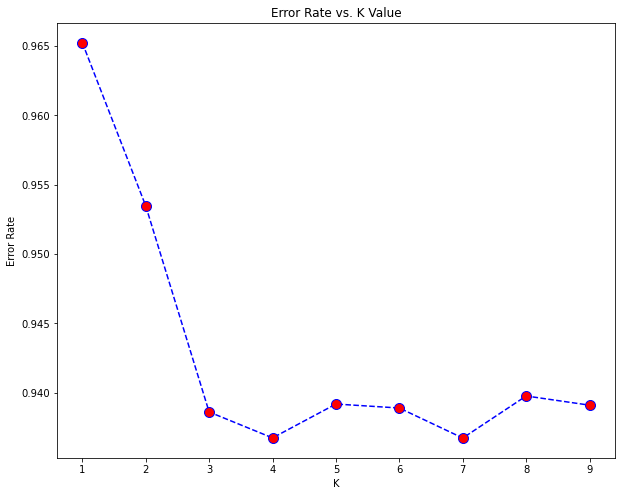

In [96]:
error_Mat=[]
for i in range (1,10):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(r2_score(y_test,predict_i))
plt.figure(figsize=(10,8))
plt.plot(range(1,10),error_Mat,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [98]:
M11=KNeighborsRegressor(n_neighbors=4)
M11.fit(X_train,y_train)
P11=M11.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P11)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P11))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P11))
print('\n')
print('R2_Score',r2_score(y_test,P11))

mean_squared_error: 2.4868859125838054


mean_absolute_error: 1.5851461038961037


mean_squared_error: 6.184601542207788


R2_Score 0.9367516253060495


## Support Vector Machine

In [99]:
from sklearn.svm import SVR

#### Cant be used for Multiple Output

## GradientBoostingRegressor

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

#### Cant be used for Multiple Output

## AdaBoostRegressor

In [103]:
from sklearn.ensemble import AdaBoostRegressor

#### Cant be used for Multiple Output

## XGBRegressor

In [105]:
from xgboost import XGBRegressor

In [106]:
M12=XGBRegressor()
M12.fit(X_train,y_train)
P12=M12.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P12)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P12))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P12))
print('\n')
print('R2_Score',r2_score(y_test,P12))

mean_squared_error: 0.5993052518936254


mean_absolute_error: 0.3505325635067828


mean_squared_error: 0.3591667849472817


R2_Score 0.9962101113965538


## CatBoostRegressor

In [107]:
from catboost import CatBoostRegressor

#### Cant be used for Multiple Output

## LGBMRegressor

In [109]:
from lightgbm import LGBMRegressor

#### Cant be used for Multiple Output

## Neural Network Regression

In [111]:
from sklearn.neural_network import MLPRegressor

In [118]:
M13=MLPRegressor(hidden_layer_sizes=(1000,))
M13.fit(X_train,y_train)
P13=M13.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P13)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P13))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P13))
print('\n')
print('R2_Score',r2_score(y_test,P13))

mean_squared_error: 2.914157815981184


mean_absolute_error: 2.0649468145577496


mean_squared_error: 8.492315776444222


R2_Score 0.9131096207802158


## ALL AT ONE PLACE

In [119]:
Name=['Linear Regression','Linear Regression digree 2','Linear Regression digree 3','Ridge Regression',
      'Ridge Regression digree 2','Ridge Regression digree 3','Lasso','Lasso digree 2',
     'Decision Tree Regressor','Random Forest Regressor','KNN Regressor','XGBoost','Neural Network Regression']
clfs= [M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13]

In [120]:
results=[]
for i in clfs:
    i.fit(X_train,y_train)
    r2=r2_score(y_test, i.predict(X_test))
    results.append(r2)

In [121]:
score= pd.DataFrame(results,index=Name)
score.columns=['R2']
score.sort_values(by='R2',ascending=False)

,R2
XGBoost,0.996210
Linear Regression digree 3,0.983430
Linear Regression digree 2,0.980918
Decision Tree Regressor,0.978679
Random Forest Regressor,0.978310
Ridge Regression digree 3,0.974713
Ridge Regression digree 2,0.939870
KNN Regressor,0.936752
Neural Network Regression,0.918776
Linear Regression,0.902705


In [122]:
feature_imp = pd.DataFrame(M12.feature_importances_ ,index=df.columns[0:8])
feature_imp.sort_values(by=0,ascending=False)

,0
Relative_Compactness,0.902230
Glazing_Area,0.056519
Roof_Area,0.021859
Wall_Area,0.009810
Glazing_Area_Distribution,0.005714
Orientation,0.003869
Surface_Area,0.000000
Overall_Height,0.000000


<AxesSubplot:>

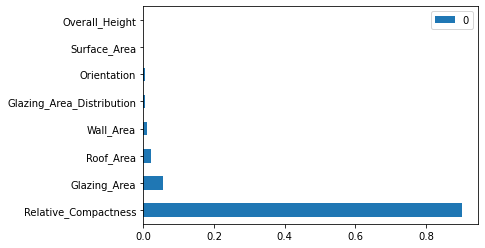

In [123]:
feature_imp.sort_values(by=0,ascending=False).plot(kind='barh')

## Principal Component Analysis

In [129]:
from sklearn.feature_selection import RFE

model=RFE(M12,n_features_to_select=4)      # RFC- Random Forest Classifier

model.fit(X_train, y_train)

P14=model.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P14)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P14))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P14))
print('\n')
print('R2_Score',r2_score(y_test,P14))

mean_squared_error: 1.2859714165595364


mean_absolute_error: 0.7690659241242844


mean_squared_error: 1.6537224842081406


R2_Score 0.9823032049837302


In [131]:
accuracy=r2_score(y_test,P12)
accuracy

0.9962101113965538

In [132]:
print(X_test[:1])
print(y_test[:1])

[[-1.34498313  1.52879024  1.12425064  0.95706259 -0.98384385 -1.36441084
   1.22779036  0.12918878]]
     Heating_Load  Cooling_Load
668         16.47          16.9


In [134]:
predicted_Load=M12.predict(X_test[:1])

Load_at_max_accuracy=(predicted_Load*(accuracy))
Load_range= Load_at_max_accuracy-predicted_Load

min_Load=predicted_Load+Load_range
max_Load=predicted_Load-Load_range

print(predicted_Load)
print(max_Load,min_Load)

[[15.079522 16.655872]]
[[15.136672 16.718996]] [[15.022372 16.592749]]
